In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

df_stat = pd.read_excel('tournament_statistics.xlsx', sheet_name='Pokemon_Stats')
df_mtn = pd.read_excel('tournament_statistics.xlsx', sheet_name='Metronome_Data')
df_match = pd.read_excel('tournament_statistics.xlsx', sheet_name='Match_Data')
df_team = pd.read_excel('tournament_statistics.xlsx', sheet_name='Team_Data')

Team's Avg. Stat Total using Vertical bar graph

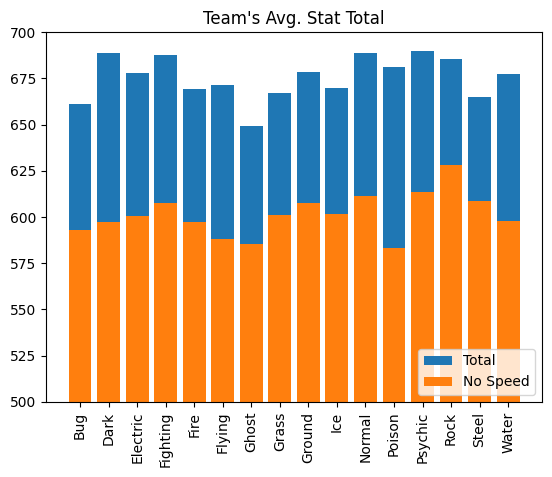

In [68]:
df = df_stat
df_group = df.groupby('Team').agg(
    Total=('Total', 'mean'),
    Total_No_Speed=('Total_No_Speed', 'mean')
).reset_index()
# using Matplotlib
plt.bar(df_group['Team'], df_group['Total'], label='Total')
plt.bar(df_group['Team'], df_group['Total_No_Speed'], label='No Speed')
plt.title("Team's Avg. Stat Total")
plt.xticks(rotation=90)
plt.ylim(500, 700)
plt.legend(loc='lower right')
plt.show()
# using Plotly
fig = px.bar(df_group, x='Team', y=['Total', 'Total_No_Speed'], barmode='overlay')
fig.update_layout(title="Team's Avg. Stat Total", xaxis_title='', yaxis_title='')
fig.update_yaxes(range=[500, 700])
fig.show()

Move Percentage by Type using Pie chart

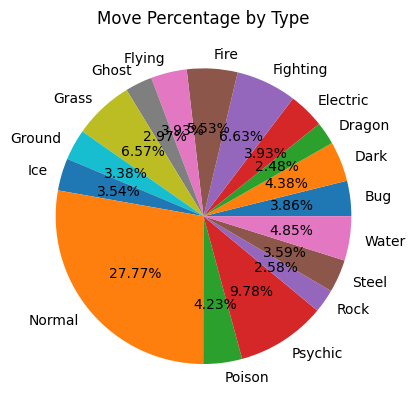

In [45]:
df = df_mtn
df_group = df.groupby('Type')['Usage'].sum().reset_index()
# using Matplotlib
plt.pie(df_group['Usage'], labels=df_group['Type'], autopct="%1.2f%%")
plt.title('Move Percentage by Type')
plt.show()
# using Plotly
fig = px.pie(df_group, values='Usage', names='Type')
fig.update_layout(title='Move Percentage by Type')
fig.update_traces(textposition='outside', textinfo='label+percent', showlegend=False)
fig.show()

Move Distribution using Histogram

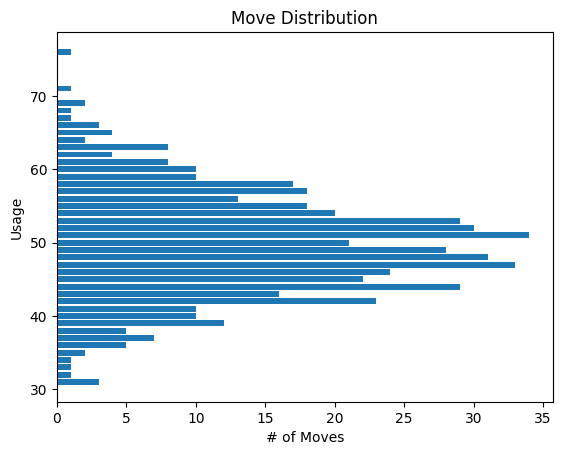

In [65]:
df = df_mtn
df_group = df.groupby('Usage')['Move'].count().reset_index() 
# using Matplotlib
plt.barh(df_group['Usage'], df_group['Move'])
plt.title('Move Distribution')
plt.xlabel('# of Moves')
plt.ylabel('Usage')
plt.show()
# using Plotly
fig = px.bar(x=df_group['Move'], y=df_group['Usage'], orientation='h')
fig.update_layout(title='Move Distribution', xaxis_title='# of Moves', yaxis_title='Usage')
fig.show()

Team's Defeats/Faints using Line chart

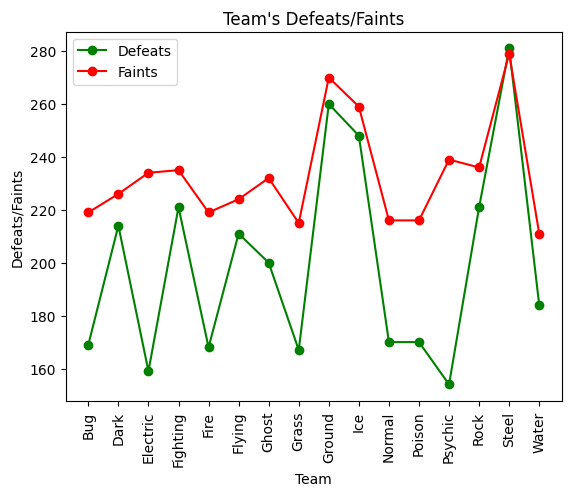

In [79]:
df = df_match
df_group = df.groupby('Team').agg(
    Defeats=('Defeats', 'sum'),
    Faints=('Faints', 'sum')
).reset_index()
# using Matplotlib
plt.plot(df_group['Team'], df_group['Defeats'], color='green', label='Defeats', marker='o')
plt.plot(df_group['Team'], df_group['Faints'], color='red', label='Faints', marker='o')
plt.title("Team's Defeats/Faints")
plt.xlabel('Team')
plt.ylabel('Defeats/Faints')
plt.xticks(rotation=90)
plt.legend()
plt.show()
# using Plotly
fig = px.line(df_group, x='Team', y=['Defeats', 'Faints'], markers=True)
fig.update_layout(title="Team's Defeats/Faints", xaxis_title='Team', yaxis_title='Defeats/Faints')
fig.show()

Team's Damage Given/Taken using Area chart

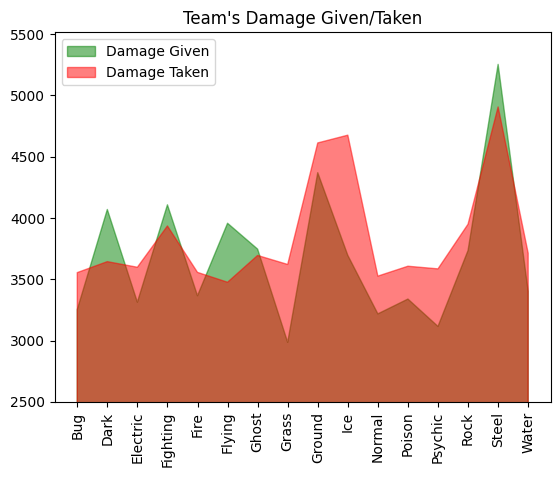

In [121]:
df = df_match
df_group = df.groupby('Team').agg(
    Damage_Given=('Damage_Given', 'mean'),
    Damage_Taken=('Damage_Taken', 'mean')
).reset_index()
# using Matplotlib
plt.fill_between(df_group['Team'], df_group['Damage_Given'], color='green', alpha=0.5, label='Damage Given')
plt.fill_between(df_group['Team'], df_group['Damage_Taken'], color='red', alpha=0.5, label='Damage Taken')
plt.title("Team's Damage Given/Taken")
plt.xticks(rotation=90)
plt.ylim(2500)
plt.legend(loc='upper left')
plt.show()
# using Plotly
trace1 = go.Scatter(x=df_group['Team'], y=df_group['Damage_Given'], fill='tozeroy', line=dict(color='green'), name='Damage Given')
trace2 = go.Scatter(x=df_group['Team'], y=df_group['Damage_Taken'], fill='tonexty', line=dict(color='red'), name='Damage Taken')
fig = go.Figure(data=[trace2, trace1])
fig.update_layout(title="Team's Damage Given/Taken")
fig.update_yaxes(range=[2500, 5500])
fig.show()

Win Percentage using Horizontal bar graph

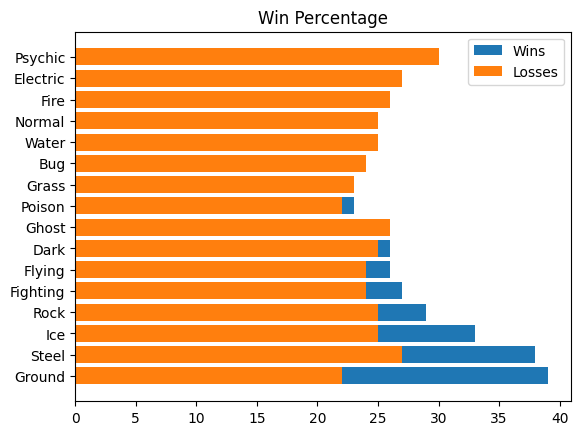

In [138]:
df = df_team
df[['Team', 'Games_Won', 'Games_Lost']]
# using Matplotlib
plt.barh(df['Team'], df['Games_Won'], label='Wins')
plt.barh(df['Team'], df['Games_Lost'], label='Losses')
plt.title('Win Percentage')
plt.legend()
plt.show()
# using Plotly
trace_wins = go.Bar(y=df['Team'], x=df['Games_Won'], orientation='h', name='Wins')
trace_losses = go.Bar(y=df['Team'], x=df['Games_Lost'], orientation='h', name='Losses')
layout = go.Layout(title='Win Percentage', barmode='stack')
fig = go.Figure(data=[trace_wins, trace_losses], layout=layout)
fig.show()